In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_file = 'train.csv'
test_file = 'test.csv'
data_dict = 'data_dict.csv'

In [3]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
data_dict = pd.read_csv(data_dict)

In [4]:
x_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1:]

x_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1:]
print(x_test.shape)
print(x_train.shape)

(1850, 29)
(8017, 29)


In [5]:
def get_unique_value(data):
    
    unique_dict = {}
    
    for col in data.columns:
        unique_dict[col] = data[col].unique()
    
    return unique_dict

In [33]:
a = get_unique_value(train_data)
for i in a['revenueChange'].tolist():
    if type(i) is not float:
        print(i)

In [7]:
data_dict

,Variable,Type,Description
0,customerID,Numeric,Customer ID
1,children,Categorical,There are children present in the customer's h...
2,credit,Categorical,"The customers credit rating {a, aa, b, c, de,..."
3,creditCard,Categorical,"The customer owns a credit card {true, false}"
4,custcare,Numeric,average number of calls to customer calls in t...
5,custcareTotal,Numeric,total calls to customer calls in the last 6 mo...
6,custcareLast,Numeric,calls to customer calls in the last month
7,directas,Numeric,The number of directory assisted calls made in...
8,directasLast,Numeric,The number of directory assisted calls made la...
9,dropvce,Numeric,The number of calls dopped in the last 6 months


In [8]:
def get_type_var(data, type_col_name="Type", var_col_name="Variable"):
    
    numeric_list = []
    categorical_list = []

    for index, row in data.iterrows():
        if row[type_col_name] == "Numeric":
            numeric_list.append(row[var_col_name])
        else:
            categorical_list.append(row[var_col_name])
    
    return numeric_list, categorical_list        

In [9]:
numeric_features, categorical_features = get_type_var(data_dict)
categorical_features

['children',
 'credit',
 'creditCard',
 'marry',
 'occupation',
 'regionType',
 'churn']

In [10]:
train_data[numeric_features].describe()

,customerID,custcare,custcareTotal,custcareLast,directas,directasLast,dropvce,dropvceLast,income,mou,...,overage,overageMax,overageMin,peakOffPeak,peakOffPeakLast,recchrge,revenue,revenueTotal,revenueChange,roam
count,8.017000e+03,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,...,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000,8017.000000
mean,1.049894e+06,1.749408,8.140701,1.732942,0.901709,0.876762,6.025321,5.970687,4.280030,522.627843,...,42.037077,44.668695,39.390298,2.085098,2.087555,46.263166,61.740842,279.044857,0.043329,1.155420
std,2.903745e+04,6.225607,33.829264,6.259815,2.234632,2.206195,8.764778,8.764695,3.146425,544.995095,...,110.623271,116.818991,104.674231,2.889042,2.892577,24.007336,43.799665,243.164024,0.564595,5.770762
min,1.000004e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.024712e+06,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,149.448476,...,0.000000,0.000000,0.000000,0.760204,0.759036,30.000000,38.015000,121.120000,-0.016782,0.000000
50%,1.049300e+06,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,5.000000,363.004876,...,0.000000,0.000000,0.000000,1.372681,1.372549,44.990000,50.786667,239.940000,0.000000,0.000000
75%,1.075541e+06,1.000000,6.000000,1.000000,1.000000,1.000000,8.000000,8.000000,7.000000,711.690109,...,42.881292,45.992792,40.186734,2.456583,2.461538,59.990000,72.891667,359.940000,0.016763,0.000000
max,1.099988e+06,376.000000,2253.000000,387.000000,55.000000,52.000000,114.000000,110.000000,9.000000,6494.324859,...,4313.142208,4565.211552,4098.293588,79.333333,79.333333,337.980000,577.211667,3463.270000,14.463000,149.000000


In [11]:
train_data[categorical_features].describe()

,children,creditCard,churn
count,8017.000000,8017.000000,8017.000000
mean,0.240863,0.665960,0.497443
std,0.427634,0.471683,0.500025
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


# Visualisation

In [12]:
# visualise distribution
def plot_distribution(feature):
    sns.set_style("ticks")
    s = sns.FacetGrid(train_data, hue="churn", aspect=2.5, palette={1: 'Lightblue', 0: "pink"})
    s.map(sns.kdeplot, feature, shade=True, alpha=0.8)
    s.set(xlim=(0, train_data[feature].max()))
    s.add_legend()
    s.set_axis_labels(feature, "Proportion")
    plt.show()

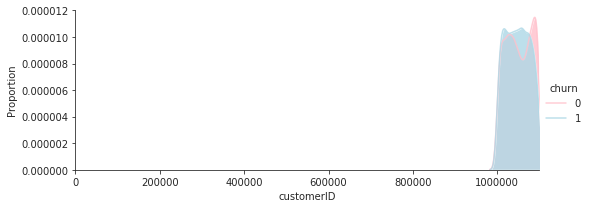

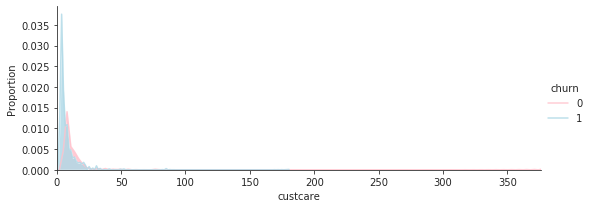

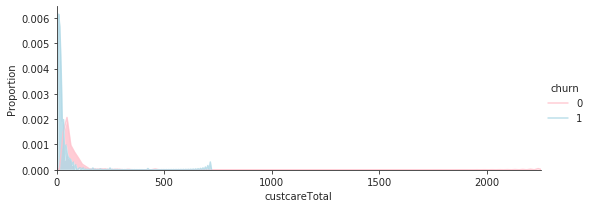

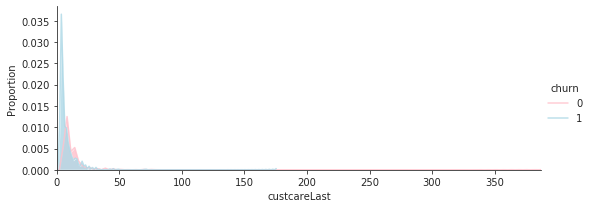

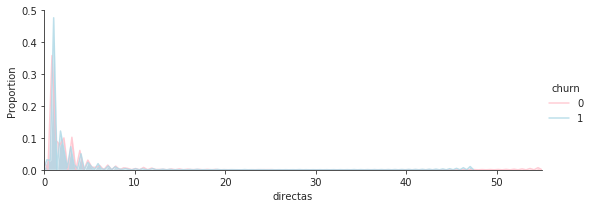

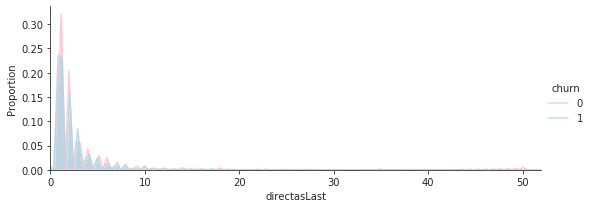

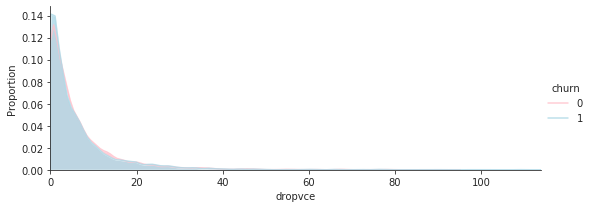

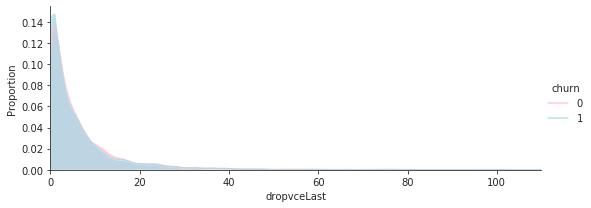

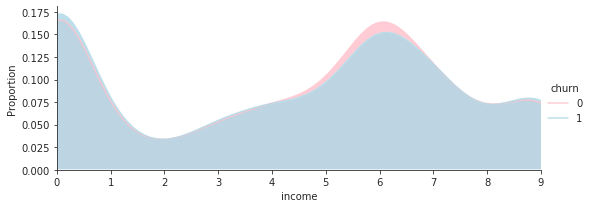

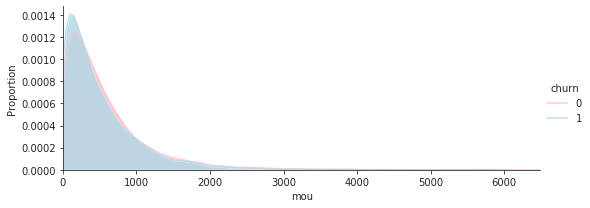

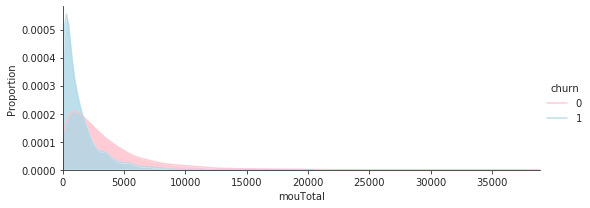

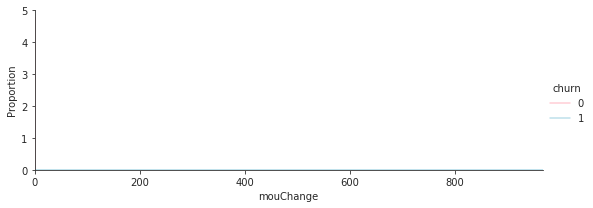

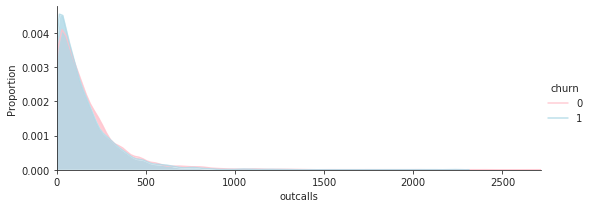

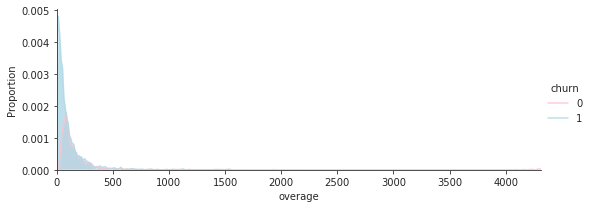

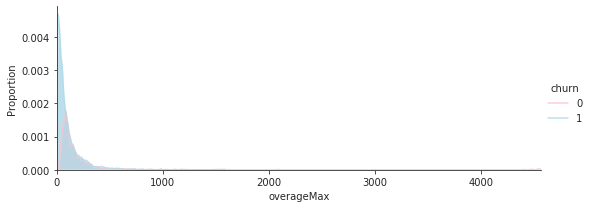

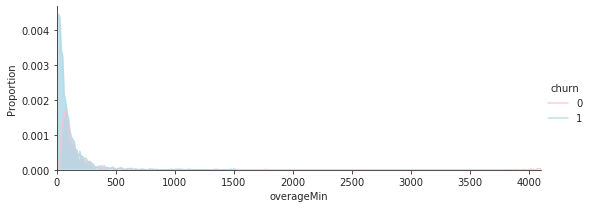

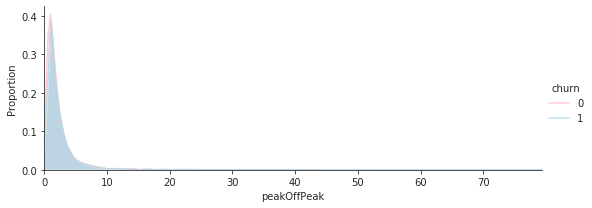

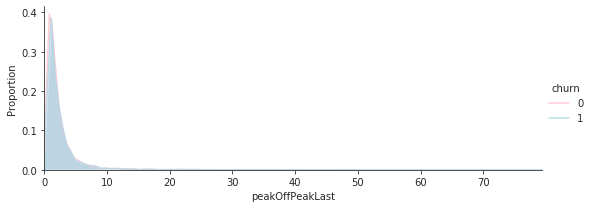

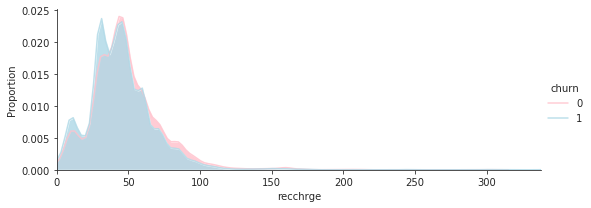

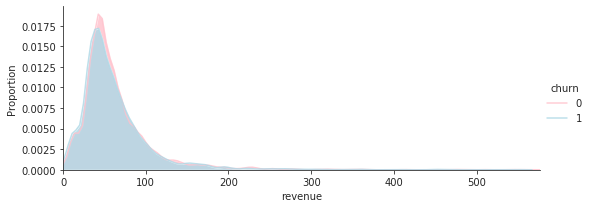

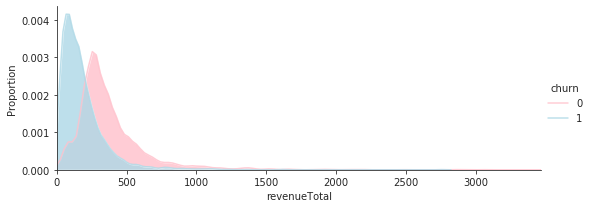

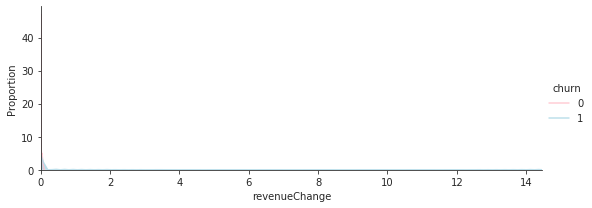

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

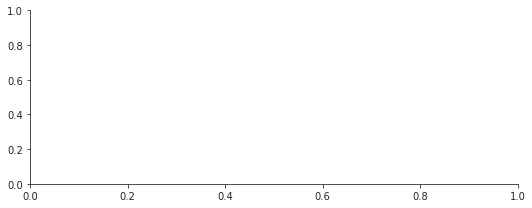

In [13]:
for feature in numeric_features:
    plot_distribution(feature)

In [22]:
def categorical_visualisation(feature, churn_col_name="churn"):

    index_value = train_data[feature].unique().tolist()

    churn = []
    stay = []

    for value in index_value:
        col_data = train_data.loc[train_data[feature] == value][churn_col_name]

        churn.append(sum(col_data))
        stay.append(len(col_data) - sum(col_data))

    new_df = pd.DataFrame({"churn": churn, "stay": stay}, index=index_value)
    
    new_df.plot.bar(rot=0)
    
    plt.title("Churn rate by " + feature)
    plt.show()

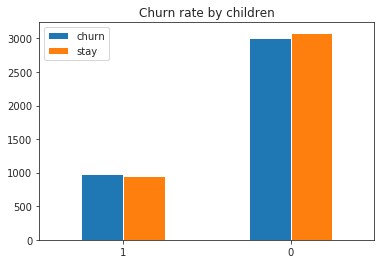

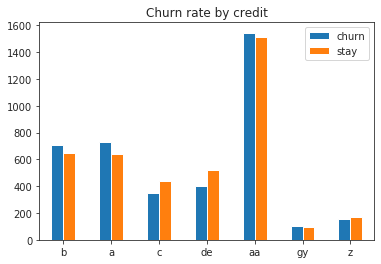

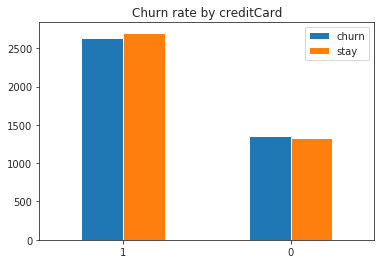

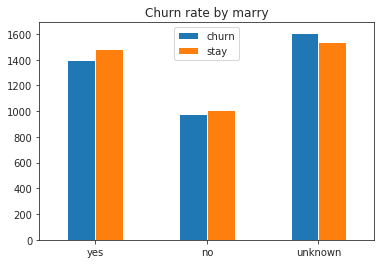

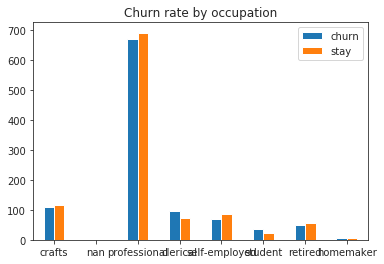

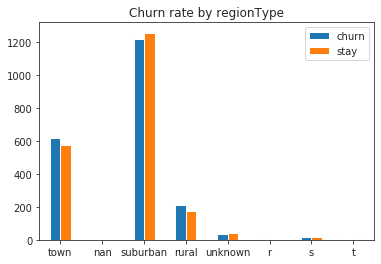

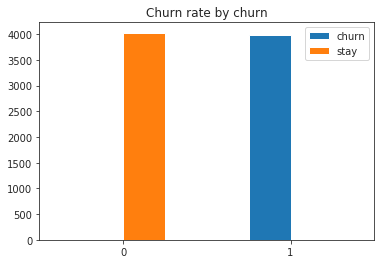

In [23]:
for feature in categorical_features:
    categorical_visualisation(feature)

# Feature Engineering

to be updated

# Modelling

In [16]:
# Split ratio train_data : val_data
split_ratio = 0.8

split_data = np.split(train_data, [int(train_data.shape[0] * 0.8)], axis=0)

train_data_n = split_data[0]
val_data = split_data[1]

print(train_data.shape)
print(val_data.shape)

(8017, 30)
(1604, 30)


In [17]:
# Import library
from sklearn.ensemble import RandomForestClassifier

# Build model

X = pd.get_dummies(train_data_n.iloc[:, :-1])
y = train_data_n["churn"]

model = RandomForestClassifier(n_estimators=400, max_depth=5, random_state=1)
model.fit(X, y)

print(".... Finish training model.")

.... Finish training model.


In [18]:
X_val = pd.get_dummies(val_data)
y_val = val_data["churn"].tolist()

predictions = model.predict(X_val)
pred_list = predictions.tolist()

In [19]:
y_true = []
y_pred = []

accurate_pred = 0
total_pred = 0

for i in range(val_data.shape[0]):
    if pred_list[i] == y_val[i]:
        accurate_pred += 1
    
    total_pred += 1
    
    y_true.append(y_val[i])
    y_pred.append(pred_list[i])

print("The percentage of correct predictions is: ", accurate_pred / total_pred * 100)

The percentage of correct predictions is:  83.66583541147132


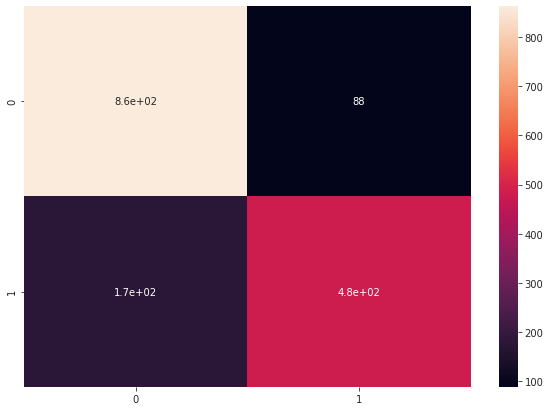

In [20]:
# Confusion matrix
# Import confusion_matrix lib
from sklearn.metrics import confusion_matrix

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)

# Visualise confusion matrix
df_cm = pd.DataFrame(cf_matrix, index = [i for i in range(2)], columns = [i for i in range(2)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [21]:
# test data
X_test = pd.get_dummies(x_test)
y_test = y_test.values.tolist()

predictions_test = model.predict(X_test)
pred_list_test = predictions_test.tolist()

ValueError: Number of features of the model must match the input. Model n_features is 49 and input n_features is 48 